In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

data10keV = pd.read_csv('data10keV.csv')
data30keV = pd.read_csv('data30keV.csv')
data50keV = pd.read_csv('data50keV.csv')
data70keV = pd.read_csv('data70keV.csv')
data90keV = pd.read_csv('data90keV.csv')

In [37]:
np.array(data30keV['DEPTH'])[-1]

30.2

In [38]:
def plot3dVacancy(DEPTH,data,thickness,lab):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 2e8, vary=True)
    params['center'].set(value = 0, vary=True)
    params['sigma'].set(value = 7.5, vary=True)
    model_fit = model.fit(data, params, x=DEPTH)
    fit_x = np.linspace(0,np.array(DEPTH)[-1],1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    if lab == 0:
        # ax.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', lw = 1.3)
    else:
        # ax.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 1.3)
    
    obj = ax.fill_between(fit_x, 0, fitcurve, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = thickness, zdir = 'y')

In [39]:
def plot3dSilicon(DEPTH,data,thickness,lab):
    if lab == 0:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = 'aqua')
    else:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = 'aqua', label = 'Silicon Atom Distribution')

No handles with labels found to put in legend.


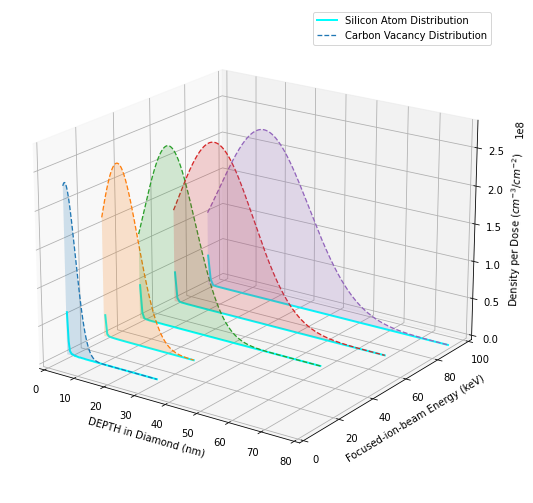

In [40]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.set_zlim(0, 2.8e8)
ax.set_xlabel('DEPTH in Diamond (nm)')
ax.set_ylabel('Focused-ion-beam Energy (keV)')
ax.set_zlabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

plot3dSilicon(data10keV['DEPTH'],data10keV['Si'], 10,1)
plot3dSilicon(data30keV['DEPTH'],data30keV['Si'], 30,0)
plot3dSilicon(data50keV['DEPTH'],data50keV['Si'],50,0)
plot3dSilicon(data70keV['DEPTH'],data70keV['Si'], 70,0)
plot3dSilicon(data90keV['DEPTH'],data90keV['Si'], 90,0)


plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1)
plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0)
plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0)
plot3dVacancy(data70keV['DEPTH'][1:],data70keV['C'][1:]*1e8, 70,0)
plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0)


ax.view_init(elev=20., azim=-55)

ax.legend()